In [200]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cognifyz-technologies-tasks/Dataset .csv


### Imports 

In [201]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MultiLabelBinarizer, OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
import pandas as pd

### Data Collection and Preprocessing

In [203]:
data = pd.read_csv('/kaggle/input/cognifyz-technologies-tasks/Dataset .csv')

In [204]:
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [205]:
data.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [206]:
data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

### Data Cleaning 

In [207]:
rest_data = data.copy()

In [208]:
rest_data.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


In [209]:
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [210]:
rest_data = rest_data.drop(columns=['Restaurant ID', 'Locality Verbose', 'Country Code', 
                                    'Restaurant Name','Address', 'Locality'])

In [211]:
rest_data['Aggregate rating'].unique()

array([4.8, 4.5, 4.4, 4.9, 4. , 4.2, 4.3, 3.6, 4.7, 3. , 3.8, 3.7, 3.2,
       3.1, 0. , 4.1, 3.3, 4.6, 3.9, 3.4, 3.5, 2.2, 2.9, 2.4, 2.6, 2.8,
       2.1, 2.7, 2.5, 1.8, 2. , 2.3, 1.9])

In [212]:
rest_data.columns

Index(['City', 'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two',
       'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Price range',
       'Aggregate rating', 'Rating color', 'Rating text', 'Votes'],
      dtype='object')

In [175]:
rest_data.head(3)

,City,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,Makati City,121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,Makati City,121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,Mandaluyong City,121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


### Data Visualization 

In [213]:
# Top 10 cuisines type

# Count the Number of restaurants
restaurant_count = rest_data['Cuisines'].value_counts().reset_index()
restaurant_count.columns = ['Cuisines', 'Count']

# Select the top 10 restaurants
top_restaurant_types = restaurant_count.head(10)

# Create the interactive bar plot
fig = px.bar(
    top_restaurant_types, 
    x='Count', 
    y='Cuisines', 
    orientation='h',
    labels={'Count': 'Number of Cuisines', 'Restaurant Name': 'Cuisines'},
    title='Top 10 Cuisines'
)

# Customize the layout
fig.update_layout(
    xaxis=dict(title='Number of Cuisines'), 
    yaxis=dict(title='Cuisines')
)

# Show the interactive plot
fig.show()

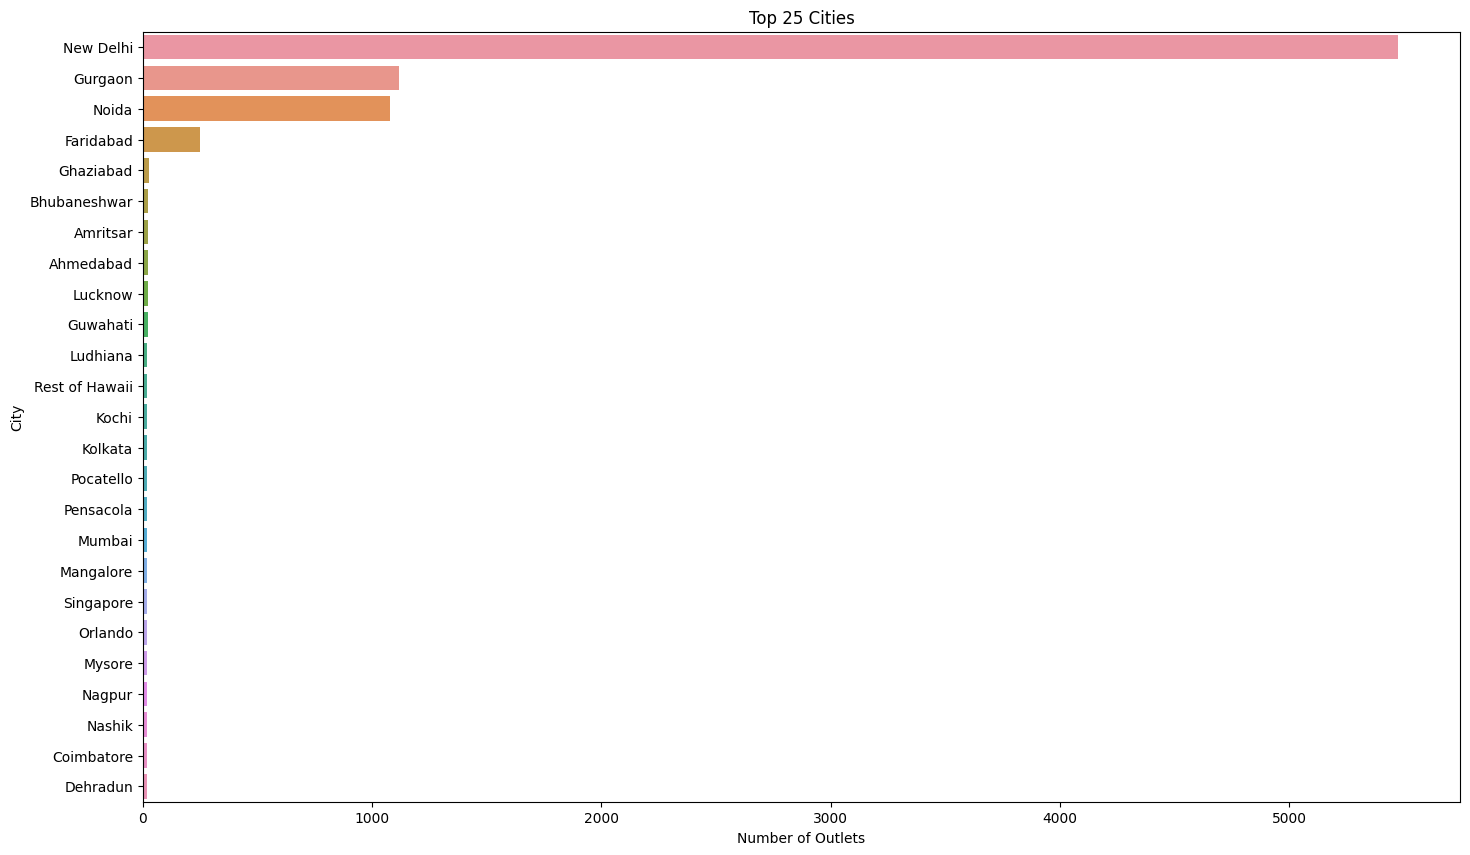

In [214]:
# Top 25 cities

plt.figure(figsize=(17, 10))
chains = rest_data['City'].value_counts()[:25]
sns.barplot(x=chains, y=chains.index)
plt.title('Top 25 Cities')
plt.xlabel('Number of Outlets')
plt.show()

In [215]:
rest_data.columns

Index(['City', 'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two',
       'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Price range',
       'Aggregate rating', 'Rating color', 'Rating text', 'Votes'],
      dtype='object')

In [216]:
rest_data.head(2)

,City,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,Makati City,121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,Makati City,121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [217]:
rest_data.columns

Index(['City', 'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two',
       'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Price range',
       'Aggregate rating', 'Rating color', 'Rating text', 'Votes'],
      dtype='object')

In [218]:
new_data = rest_data.copy()

# One hot encode categorical columns
labelencoder = LabelEncoder()

one_hot_encode_columns =['City', 'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two',
       'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Price range',
       'Aggregate rating', 'Rating color', 'Rating text', 'Votes']
for cols in one_hot_encode_columns:
    new_data[cols] = labelencoder.fit_transform(new_data[cols])

new_data.head(3)

,City,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,73,8042,384,920,73,0,1,0,0,0,2,31,0,1,314
1,73,8041,382,1111,75,0,1,0,0,0,2,28,0,1,545
2,75,8053,388,1671,113,0,1,0,0,0,3,27,1,5,270


In [219]:
new_data.columns

Index(['City', 'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two',
       'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Price range',
       'Aggregate rating', 'Rating color', 'Rating text', 'Votes'],
      dtype='object')

### Model Training

In [220]:
new_data.head()

,City,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,73,8042,384,920,73,0,1,0,0,0,2,31,0,1,314
1,73,8041,382,1111,75,0,1,0,0,0,2,28,0,1,545
2,75,8053,388,1671,113,0,1,0,0,0,3,27,1,5,270
3,75,8050,391,1126,81,0,0,0,0,0,3,32,0,1,362
4,75,8055,390,1122,81,0,1,0,0,0,3,31,0,1,229


In [221]:

X = new_data.drop(['Aggregate rating'], axis=1)

# Target variable
y = new_data['Aggregate rating'].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [222]:
from xgboost import XGBRegressor

In [223]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'random Forest Regressor': RandomForestRegressor(),
    'XGBoost Regressor':XGBRegressor()
}

#train and evaluate each model
for model_name,model in models.items():
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    accuracy=r2_score(y_test,y_pred)
    print(f'{model_name} Accuracy : {accuracy: .2f}','\n')

Linear Regression Accuracy :  0.48 

Decision Tree Regression Accuracy :  0.93 

random Forest Regressor Accuracy :  0.96 

XGBoost Regressor Accuracy :  0.96 



### Interpretation of Models Result

###### The provided results show the performance of four regression models used to predict restaurant ratings, evaluated based on accuracy (or another metric related to predictive quality):

Linear Regression Accuracy: 0.48

Linear regression assumes a linear relationship between the features and the target variable. Its lower accuracy suggests that the relationship between the features and restaurant ratings is not purely linear. It may also imply that the dataset contains complex patterns or interactions that a linear model cannot capture.
Decision Tree Regression Accuracy: 0.93

Decision Tree Regression improves significantly over linear regression. It can handle non-linear relationships and feature interactions, which likely exist in the dataset.
Random Forest Regressor Accuracy: 0.96

Random Forest builds an ensemble of decision trees, improving generalization and reducing overfitting. The high accuracy indicates that the dataset's patterns are captured effectively with this method.
XGBoost Regressor Accuracy: 0.96

XGBoost, an advanced gradient boosting algorithm, performs equally well as Random Forest. Its high accuracy suggests it effectively handles complex relationships in the data and leverages gradient boosting to improve predictions.

### Analyzing Influential Features

###### To determine the most influential features affecting restaurant ratings, use feature importance analysis provided 

by models like Decision Tree, Random Forest, or XGBoost. These models rank features based on their contribution to reducing error in splits or trees.


Steps to Analyze Feature Importance:
Extract Feature Importances:

For Random Forest or XGBoost, access the feature_importances_ attribute.
For Decision Trees, extract the same attribute or inspect individual splits.
